# ライブラリ

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sqlite3

print("GPU使用可：" , tf.test.gpu_device_name())

GPU使用可： /device:GPU:0


In [3]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=62058536dca310d3c771562b744b4cc778306263c113c8d0d9779552b740c7b0
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


# アップロード

In [4]:
# モデルの読み込み
from tensorflow.keras.models import load_model

# モデルアップロード
from google.colab import files
model_uploaded = files.upload()

# 保存済みのモデルを読み込み、構造を表示する
model = load_model('emotion_model_fer2013.keras')
print("✅ モデル読み込み完了")
model.summary()

Saving emotion_model_fer2013.keras to emotion_model_fer2013.keras
✅ モデル読み込み完了


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,494,359 (13.33 MB)

 Trainable params: 1,164,615 (4.44 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 2,329,232 (8.89 MB)

In [5]:
# Pythonファイルのリロード用
import importlib.util

# preprocessing.py, db_utils.py をアップロード
util_uploaded = files.upload()

def import_from_upload(filename, module_name):
    spec = importlib.util.spec_from_file_location(module_name, filename)
    mod = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(mod)
    return mod

# utils/preprocessing.py をインポート
pre = import_from_upload("preprocessing.py", "preprocessing")
# db_utils.py のインポート
db = import_from_upload("db_utils.py", "db_utils")

Saving db_utils.py to db_utils.py
Saving preprocessing.py to preprocessing.py


In [6]:
# Google Colab用：ユーザが画像をアップロードする
uploaded = files.upload()

Saving family.jpg to family.jpg
Saving my_family2.jpg to my_family2.jpg


# 表情認識


📷 処理中の画像: family.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
🎭 顔の感情は：Happy（信頼度 0.82）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
🎭 顔の感情は：Happy（信頼度 0.63）


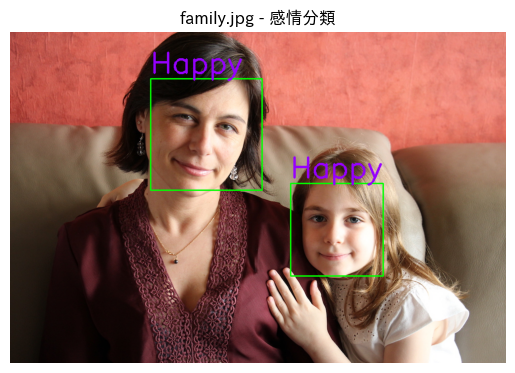


📷 処理中の画像: my_family2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
🎭 顔の感情は：Happy（信頼度 0.97）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
🎭 顔の感情は：Happy（信頼度 0.99）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
🎭 顔の感情は：Happy（信頼度 0.84）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
🎭 顔の感情は：Happy（信頼度 0.86）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
🎭 顔の感情は：Sad（信頼度 0.57）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
🎭 顔の感情は：Sad（信頼度 0.33）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
🎭 顔の感情は：Sad（信頼度 0.28）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
🎭 顔の感情は：Happy（信頼度 0.72）
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
🎭 顔の感情は：Happy（信頼度 0.96）


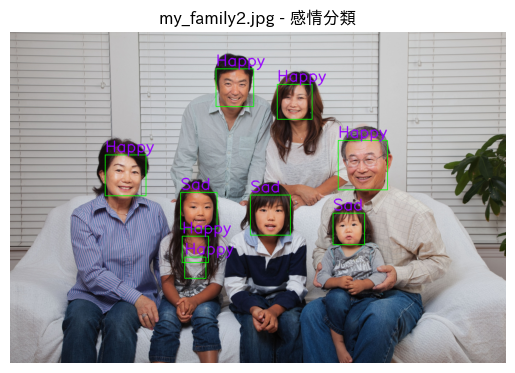

In [7]:
# 感情ラベル一覧（FER-2013用）
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# 出力用CSV初期化
results = []
# DB初期化
# db.init_db()

# 画像を読み込む（グレースケールに変換）
for file_name in uploaded.keys():
    print(f"\n📷 処理中の画像: {file_name}")
    try:
        img_color, img_gray = pre.load_image(file_name)
    except FileNotFoundError as e:
        print(f"⚠️ {e}")
        continue

    faces = pre.detect_faces(img_gray)

    # 検出された顔がない場合
    if len(faces) == 0:
        print("❌ 顔が検出されませんでした")
        results.append({
            "ファイル名": file_name,
            "検出顔数": 0,
            "表情ラベル": "検出なし",
            "信頼度": "-"
        })
        continue

    for (x, y, w, h) in faces:
        face_img = img_gray[y:y+h, x:x+w]
        face_input = pre.prepare_face(face_img)

        # 推論実行
        prediction = model.predict(face_input)
        label_index = np.argmax(prediction)
        confidence = np.max(prediction)
        label = emotion_labels[label_index]

        # 結果表示
        print(f"🎭 顔の感情は：{label}（信頼度 {confidence:.2f}）")
        results.append({
            "ファイル名": file_name,
            "検出顔数": len(faces),
            "表情ラベル": label,
            "信頼度": round(confidence, 4)
        })

        # データベース保存
        # db.insert_result(file_name, len(faces), label, float(confidence))

        # 可視化表示（枠付きで）
        cv2.rectangle(img_color, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(img_color, label, (x, y-12), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,150), 3)

    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"{file_name} - 感情分類")
    plt.axis('off')
    plt.show()

In [26]:
# 結果をCSVに保存しダウンロード
df = pd.DataFrame(results)
df.to_csv("emotion_predictions.csv", index=False, encoding='utf-8-sig')
print("✅ CSVファイルに保存しました: emotion_predictions.csv")

# Colabでダウンロード用リンク作成
files.download("emotion_predictions.csv")

✅ CSVファイルに保存しました: emotion_predictions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# DBダウンロードリンク
db_path = "emotion_results.db"
if os.path.exists(db_path):
    print(f"✅ データベース保存済み: {db_path}")
    files.download(db_path)